<a href="https://colab.research.google.com/github/adarnair/bigrquery/blob/main/capstone_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pyjanitor
!pip install pyforest

     |████████████████████████████████| 135 kB 3.5 MB/s 
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=698d42a4faa37165d1748d6d535f5f09c13993f279c8139b69cdeacf9046408a
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [8]:
import os
import janitor as jt
import pyforest

import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import matplotlib.style as style
style.use('seaborn-dark')

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.style as style
style.use('seaborn-dark')
from matplotlib.ticker import FuncFormatter

In [10]:
os.getcwd()

'/content'

In [11]:
df = pd.read_excel("/content/drive/MyDrive/Great Learning/Capstone/Input/Sales.xlsx",sheet_name = 1)

FileNotFoundError: ignored

In [ ]:
## clean column names using the janitor package

df = jt.clean_names(df)

In [ ]:
## Remove customer id column

df = df.remove_columns('custid')

### Remove irrelevant columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   agentbonus            4520 non-null   int64  
 1   age                   4251 non-null   float64
 2   custtenure            4294 non-null   float64
 3   channel               4520 non-null   object 
 4   occupation            4520 non-null   object 
 5   educationfield        4520 non-null   object 
 6   gender                4520 non-null   object 
 7   existingprodtype      4520 non-null   int64  
 8   designation           4520 non-null   object 
 9   numberofpolicy        4475 non-null   float64
 10  maritalstatus         4520 non-null   object 
 11  monthlyincome         4284 non-null   float64
 12  complaint             4520 non-null   int64  
 13  existingpolicytenure  4336 non-null   float64
 14  sumassured            4366 non-null   float64
 15  zone                 

In [ ]:
df.describe()

,agentbonus,age,custtenure,existingprodtype,numberofpolicy,monthlyincome,complaint,existingpolicytenure,sumassured,lastmonthcalls,custcarescore
count,4520.000000,4251.000000,4294.000000,4520.000000,4475.000000,4284.000000,4520.000000,4336.000000,4.366000e+03,4520.000000,4468.000000
mean,4077.838274,14.494707,14.469027,3.688938,3.565363,22890.309991,0.287168,4.130074,6.199997e+05,4.626991,3.067592
std,1403.321711,9.037629,8.963671,1.015769,1.455926,4885.600757,0.452491,3.346386,2.462348e+05,3.620132,1.382968
min,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,3027.750000,7.000000,7.000000,3.000000,2.000000,19683.500000,0.000000,2.000000,4.394432e+05,2.000000,2.000000
50%,3911.500000,13.000000,13.000000,4.000000,4.000000,21606.000000,0.000000,3.000000,5.789765e+05,3.000000,3.000000
75%,4867.250000,20.000000,20.000000,4.000000,5.000000,24725.000000,1.000000,6.000000,7.582360e+05,8.000000,4.000000
max,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


### Check for discrepancy in Categorical variables 

In [ ]:
for i in df.select_dtypes(include = 'object'):
     print(i)
     print(df[i].value_counts())

channel
Agent                  3194
Third Party Partner     858
Online                  468
Name: channel, dtype: int64
occupation
Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: occupation, dtype: int64
educationfield
Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: educationfield, dtype: int64
gender
Male       2688
Female     1507
Fe male     325
Name: gender, dtype: int64
designation
Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: designation, dtype: int64
maritalstatus
Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: maritalstatus, dtype: int64
zone
West     2566
North    1884
East       64
South       6
Name: zone, dtype: int64
paymentmethod
Half Yearly    2656
Yea

In [ ]:
## Correct data entry errors

df['gender'] = df['gender'].apply(lambda x: 'Female' if x == 'Fe male' else x)
df['educationfield'] = df['educationfield'].apply(lambda x: 'UG' if x == 'Under Graduate' else x)
df['maritalstatus'] = df['maritalstatus'].apply(lambda x: 'Single' if x == 'Unmarried' else x)
df['designation'] = df['designation'].apply(lambda x: 'Executive' if x == 'Exe' else x)
df['occupation'] = df['occupation'].apply(lambda x: 'Large Business' if x == 'Laarge Business' else x)


In [ ]:
for i in ["gender","educationfield","maritalstatus","designation","occupation"]:
     print(df[i].value_counts())

Male      2688
Female    1832
Name: gender, dtype: int64
Graduate         1870
UG               1420
Diploma           496
Engineer          408
Post Graduate     252
MBA                74
Name: educationfield, dtype: int64
Married     2268
Single      1448
Divorced     804
Name: maritalstatus, dtype: int64
Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: designation, dtype: int64
Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: occupation, dtype: int64


# Univariate Analysis

In [ ]:
## create a separate dataset for all categorical variables

ds_cat = df.select_dtypes(include = 'object')
ds_cat.head(5)

,channel,occupation,educationfield,gender,designation,maritalstatus,zone,paymentmethod
0,Agent,Salaried,Graduate,Female,Manager,Single,North,Half Yearly
1,Third Party Partner,Salaried,Graduate,Male,Manager,Divorced,North,Yearly
2,Agent,Free Lancer,Post Graduate,Male,Executive,Single,North,Yearly
3,Third Party Partner,Salaried,Graduate,Female,Executive,Divorced,West,Half Yearly
4,Agent,Small Business,UG,Male,Executive,Divorced,West,Half Yearly


In [ ]:
ds_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in ds_cat.columns:
    tmp['column'] = [c]
    tmp['values'] = [ds_cat[c].unique()]
    tmp['values_count_incna'] = len(list(ds_cat[c].unique()))
    tmp['values_count_nona'] = int(ds_cat[c].nunique())
    tmp['num_miss'] = ds_cat[c].isnull().sum()
    tmp['pct_miss'] = (ds_cat[c].isnull().sum()/ len(ds_cat)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)

In [ ]:
# Let's do an Ascending sort on the Numboer of Distinct Categories for each categorical Variables
ds_cat_stats.sort_values(by = 'values_count_incna', inplace = True, ascending = True)

# And set the index to Column Names
ds_cat_stats.set_index('column', inplace = True)
ds_cat_stats

,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
gender,"[Female, Male]",2,2,0,0.0
channel,"[Agent, Third Party Partner, Online]",3,3,0,0.0
maritalstatus,"[Single, Divorced, Married]",3,3,0,0.0
occupation,"[Salaried, Free Lancer, Small Business, Large ...",4,4,0,0.0
zone,"[North, West, East, South]",4,4,0,0.0
paymentmethod,"[Half Yearly, Yearly, Quarterly, Monthly]",4,4,0,0.0
designation,"[Manager, Executive, VP, AVP, Senior Manager]",5,5,0,0.0
educationfield,"[Graduate, Post Graduate, UG, Engineer, Diplom...",6,6,0,0.0


In [ ]:
ds_cat['agentbonus'] = df.loc[ds_cat.index, 'agentbonus'].copy()

In [ ]:
ds_cat.head(10)

,channel,occupation,educationfield,gender,designation,maritalstatus,zone,paymentmethod,agentbonus
0,Agent,Salaried,Graduate,Female,Manager,Single,North,Half Yearly,4409
1,Third Party Partner,Salaried,Graduate,Male,Manager,Divorced,North,Yearly,2214
2,Agent,Free Lancer,Post Graduate,Male,Executive,Single,North,Yearly,4273
3,Third Party Partner,Salaried,Graduate,Female,Executive,Divorced,West,Half Yearly,1791
4,Agent,Small Business,UG,Male,Executive,Divorced,West,Half Yearly,2955
5,Third Party Partner,Salaried,Graduate,Male,Executive,Single,North,Half Yearly,3252
6,Agent,Salaried,Graduate,Male,VP,Divorced,North,Yearly,3850
7,Agent,Small Business,UG,Female,Executive,Single,West,Half Yearly,2073
8,Agent,Salaried,Graduate,Male,Manager,Divorced,West,Yearly,2719
9,Online,Small Business,UG,Male,Executive,Married,West,Quarterly,3247


In [ ]:
plt.rcParams["xtick.labelsize"] = 7

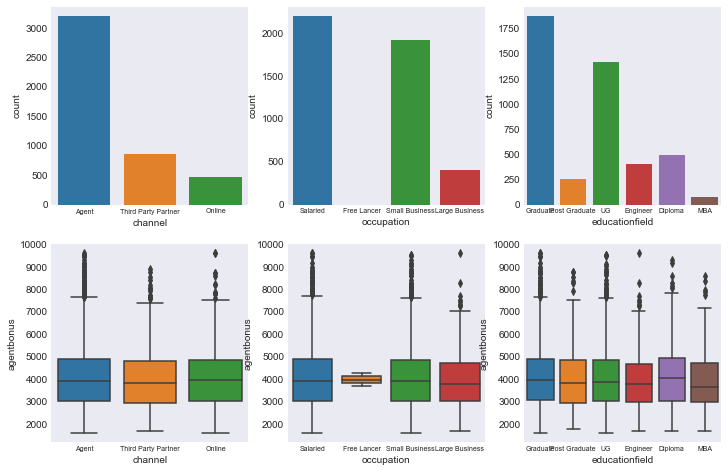

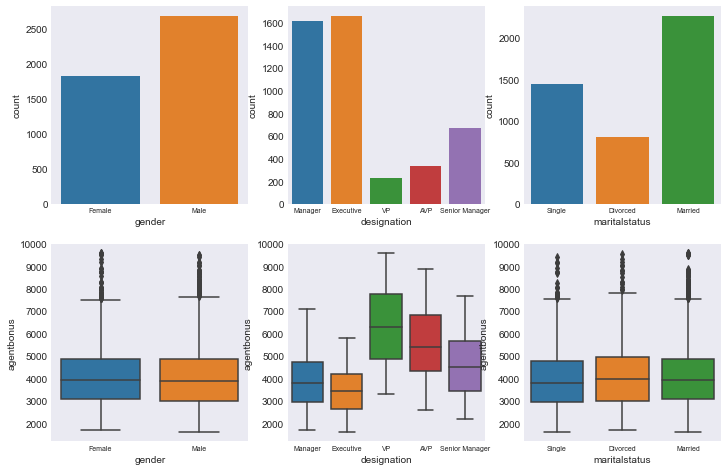

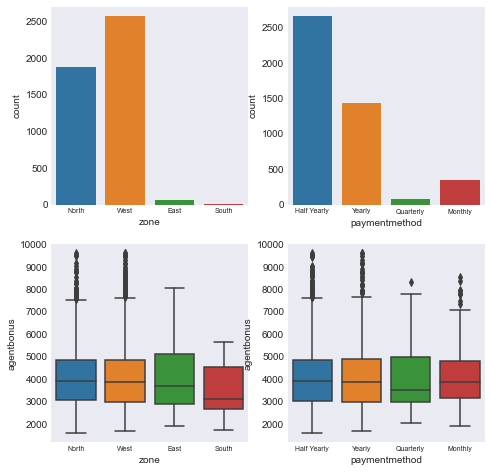

<Figure size 864x576 with 0 Axes>

In [ ]:
ix = 1
fig = plt.figure(figsize = (12,8))
for c in list(ds_cat.columns):
    if ix <= 3:
        if c != 'agentbonus':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = ds_cat, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=ds_cat, x=c, y='agentbonus', ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (12,8))
        ix =1

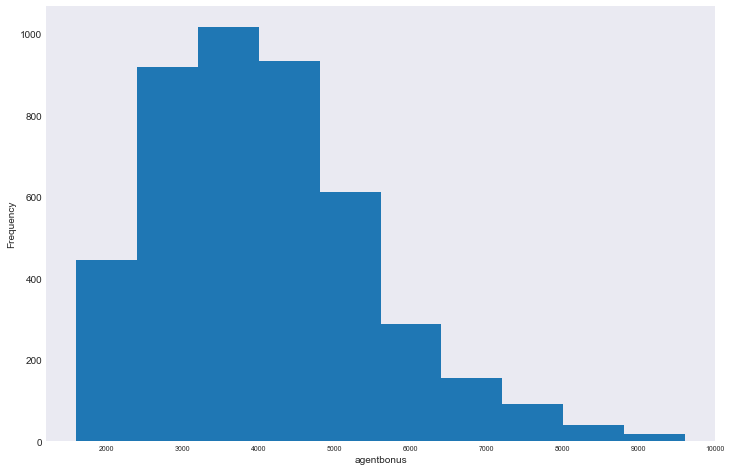

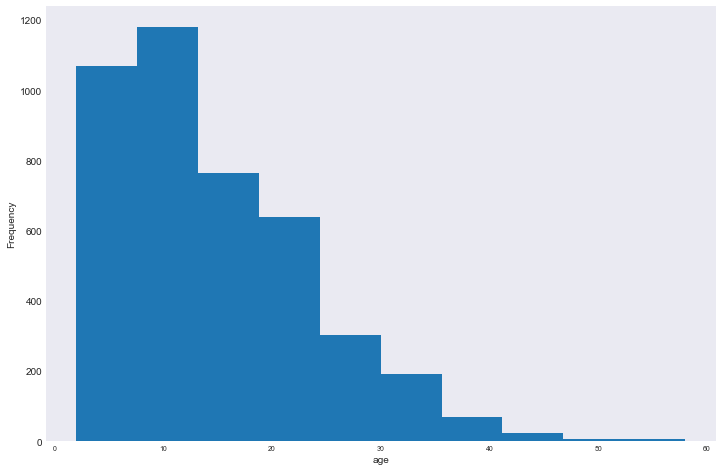

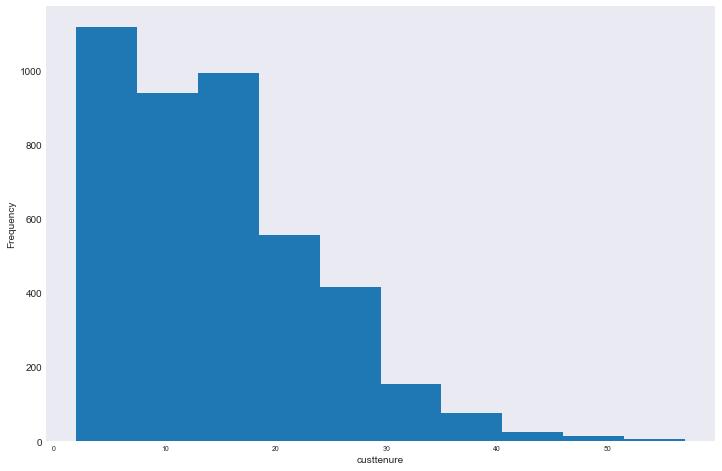

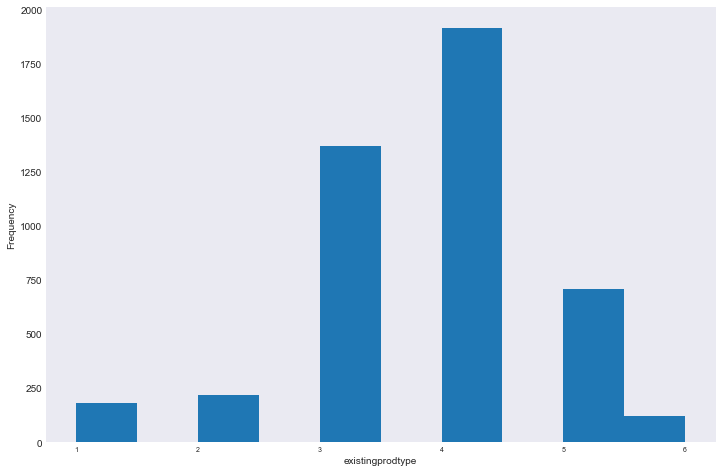

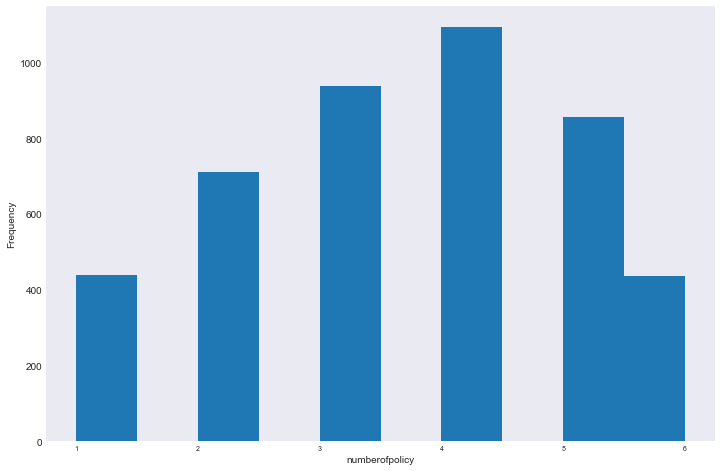

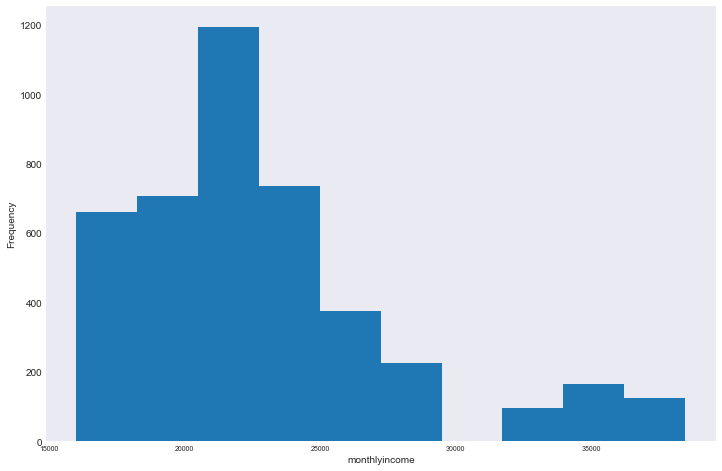

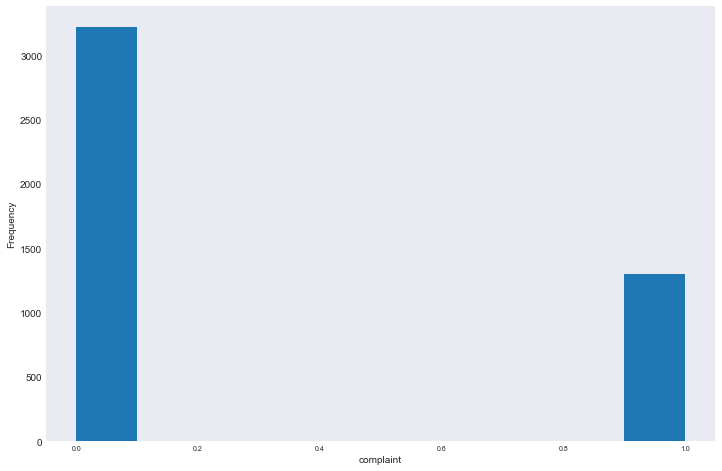

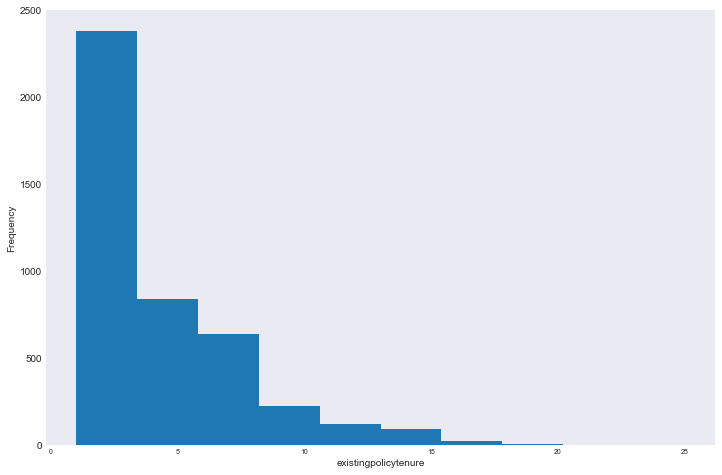

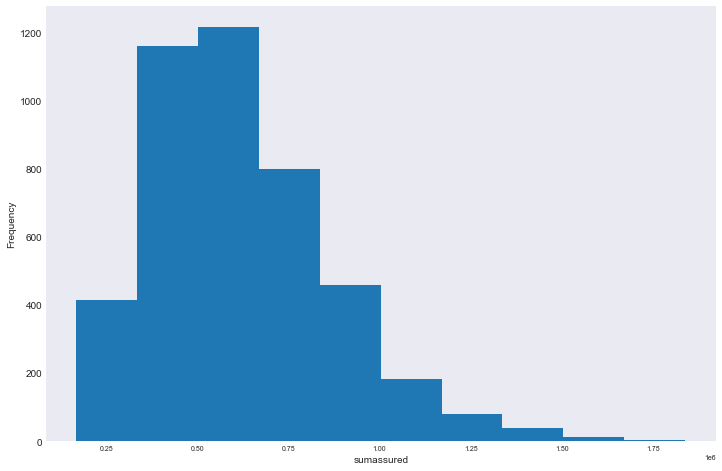

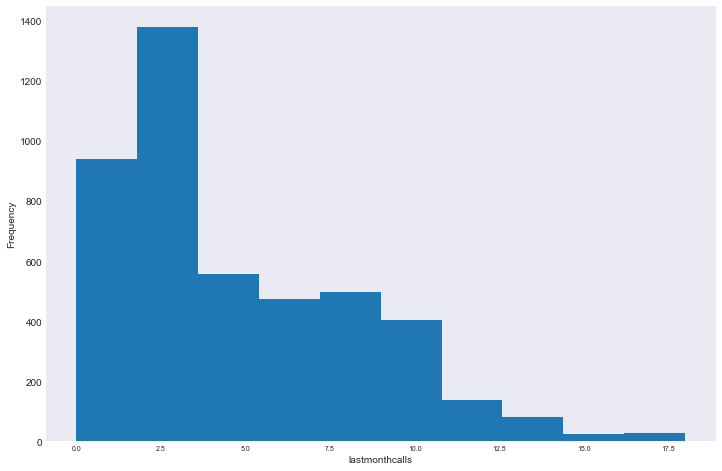

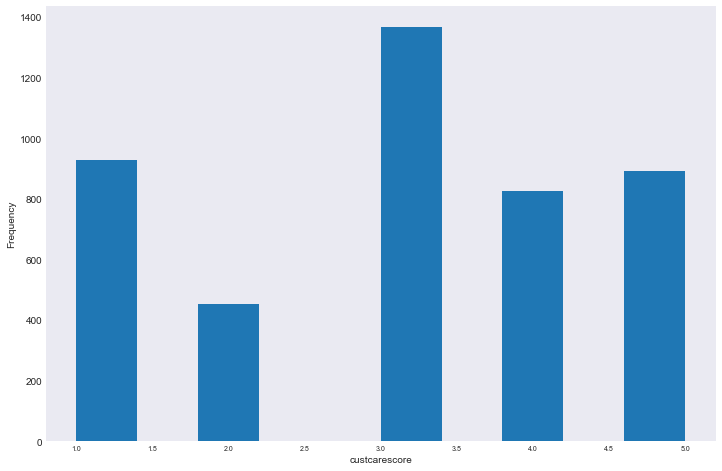

In [ ]:
for i in df.columns:
    if df[i].dtype in ("float64","int64"):
     plt.figure(figsize=(12,8))
     plt.hist(df[i])
     plt.xlabel(i)
     plt.ylabel("Frequency")
     plt.show()


In [ ]:
df.dtypes

agentbonus                int64
age                     float64
custtenure              float64
channel                  object
occupation               object
educationfield           object
gender                   object
existingprodtype          int64
designation              object
numberofpolicy          float64
maritalstatus            object
monthlyincome           float64
complaint                 int64
existingpolicytenure    float64
sumassured              float64
zone                     object
paymentmethod            object
lastmonthcalls            int64
custcarescore           float64
dtype: object

In [ ]:
ds_cat = df.select_dtypes(include = 'object').copy()
ds_cat.head(2)

,channel,occupation,educationfield,gender,designation,maritalstatus,zone,paymentmethod
0,Agent,Salaried,Graduate,Female,Manager,Single,North,Half Yearly
1,Third Party Partner,Salaried,Graduate,Male,Manager,Divorced,North,Yearly


In [ ]:
df

,agentbonus,age,custtenure,channel,occupation,educationfield,gender,existingprodtype,designation,numberofpolicy,maritalstatus,monthlyincome,complaint,existingpolicytenure,sumassured,zone,paymentmethod,lastmonthcalls,custcarescore
0,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Single,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,2939,9.0,9.0,Agent,Salaried,UG,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0


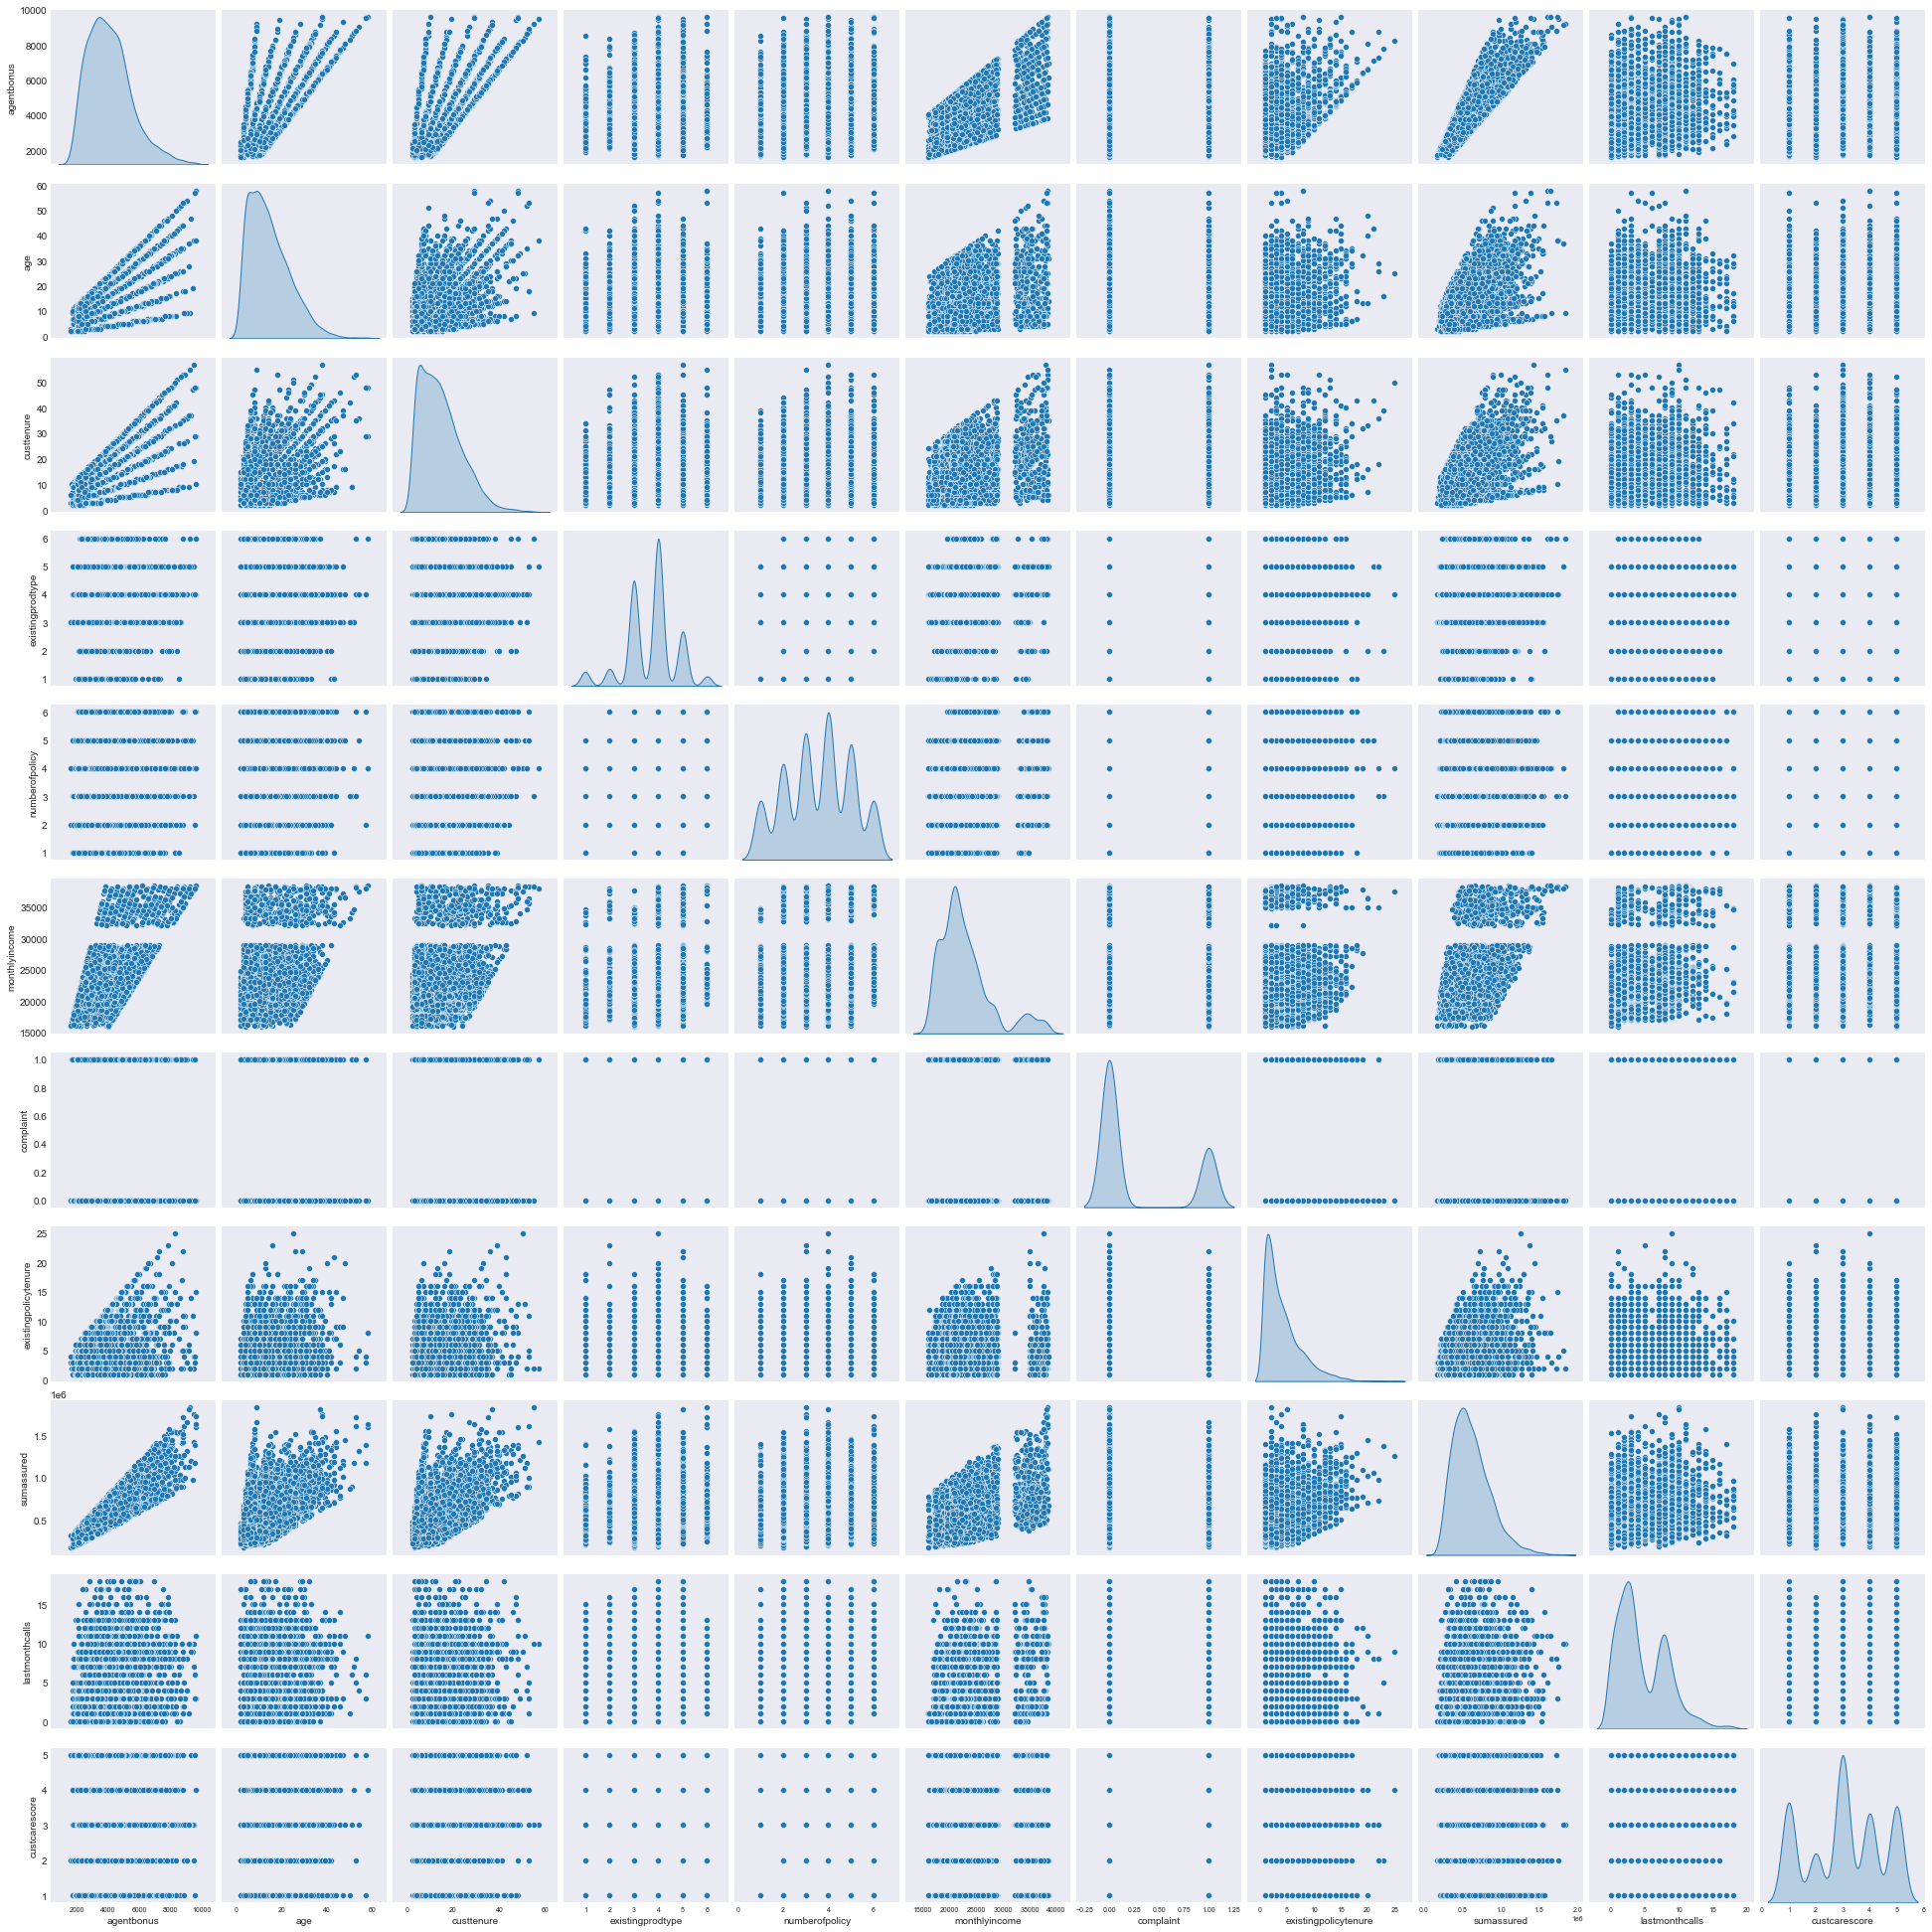

In [ ]:
#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

## Remove Outliers

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df.columns:
     if df[column].dtype != 'object': 
         lr,ur=remove_outlier(df[column])
         df[column]=np.where(df[column]>ur,ur,df[column])
         df[column]=np.where(df[column]<lr,lr,df[column])

In [ ]:
df.dtypes

agentbonus              float64
age                     float64
custtenure              float64
channel                  object
occupation               object
educationfield           object
gender                   object
existingprodtype        float64
designation              object
numberofpolicy          float64
maritalstatus            object
monthlyincome           float64
complaint               float64
existingpolicytenure    float64
sumassured              float64
zone                     object
paymentmethod            object
lastmonthcalls          float64
custcarescore           float64
dtype: object

# Part 2 - Model Building

In [ ]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [ ]:
for i in df.select_dtypes(include = 'object'):
     df[i] = df[i].astype('category')

In [ ]:
df.dtypes

agentbonus               float64
age                      float64
custtenure               float64
channel                 category
occupation              category
educationfield          category
gender                  category
existingprodtype         float64
designation             category
numberofpolicy           float64
maritalstatus           category
monthlyincome            float64
complaint                float64
existingpolicytenure     float64
sumassured               float64
zone                    category
paymentmethod           category
lastmonthcalls           float64
custcarescore            float64
dtype: object

In [ ]:
##Converting category labels into numerical using LabelEncoder

#label = LabelEncoder()
#for i in df.select_dtypes(include = 'category'):
#    label.fit(df[i].drop_duplicates())
#    df[i]= label.transform(df[i])

In [ ]:
df = pd.get_dummies(df, columns = ds_cat.columns,drop_first=True)

In [ ]:
df.isnull().sum()

agentbonus                        0
age                             269
custtenure                      226
existingprodtype                  0
numberofpolicy                   45
monthlyincome                   236
complaint                         0
existingpolicytenure            184
sumassured                      154
lastmonthcalls                    0
custcarescore                    52
channel_Online                    0
channel_Third Party Partner       0
occupation_Large Business         0
occupation_Salaried               0
occupation_Small Business         0
educationfield_Engineer           0
educationfield_Graduate           0
educationfield_MBA                0
educationfield_Post Graduate      0
educationfield_UG                 0
gender_Male                       0
designation_Executive             0
designation_Manager               0
designation_Senior Manager        0
designation_VP                    0
maritalstatus_Married             0
maritalstatus_Single        

### Scale the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,agentbonus,age,custtenure,existingprodtype,numberofpolicy,monthlyincome,complaint,existingpolicytenure,sumassured,lastmonthcalls,...,designation_Senior Manager,designation_VP,maritalstatus_Married,maritalstatus_Single,zone_North,zone_South,zone_West,paymentmethod_Monthly,paymentmethod_Quarterly,paymentmethod_Yearly
0,0.465665,0.357143,0.036364,0.375,0.2,0.222034,1.0,0.041667,0.382180,0.294118,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.101138,0.160714,0.000000,0.625,0.6,0.183588,0.0,0.083333,0.075431,0.411765,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.443079,0.428571,0.036364,0.625,0.4,0.048158,1.0,0.041667,NaN,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.030889,0.160714,NaN,0.375,0.4,0.084644,1.0,0.041667,0.059941,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.224197,0.071429,NaN,0.375,0.6,0.109547,0.0,0.125000,0.118487,0.117647,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df.isnull().sum()

agentbonus                      0
age                             0
custtenure                      0
existingprodtype                0
numberofpolicy                  0
monthlyincome                   0
complaint                       0
existingpolicytenure            0
sumassured                      0
lastmonthcalls                  0
custcarescore                   0
channel_Online                  0
channel_Third Party Partner     0
occupation_Large Business       0
occupation_Salaried             0
occupation_Small Business       0
educationfield_Engineer         0
educationfield_Graduate         0
educationfield_MBA              0
educationfield_Post Graduate    0
educationfield_UG               0
gender_Male                     0
designation_Executive           0
designation_Manager             0
designation_Senior Manager      0
designation_VP                  0
maritalstatus_Married           0
maritalstatus_Single            0
zone_North                      0
zone_South    

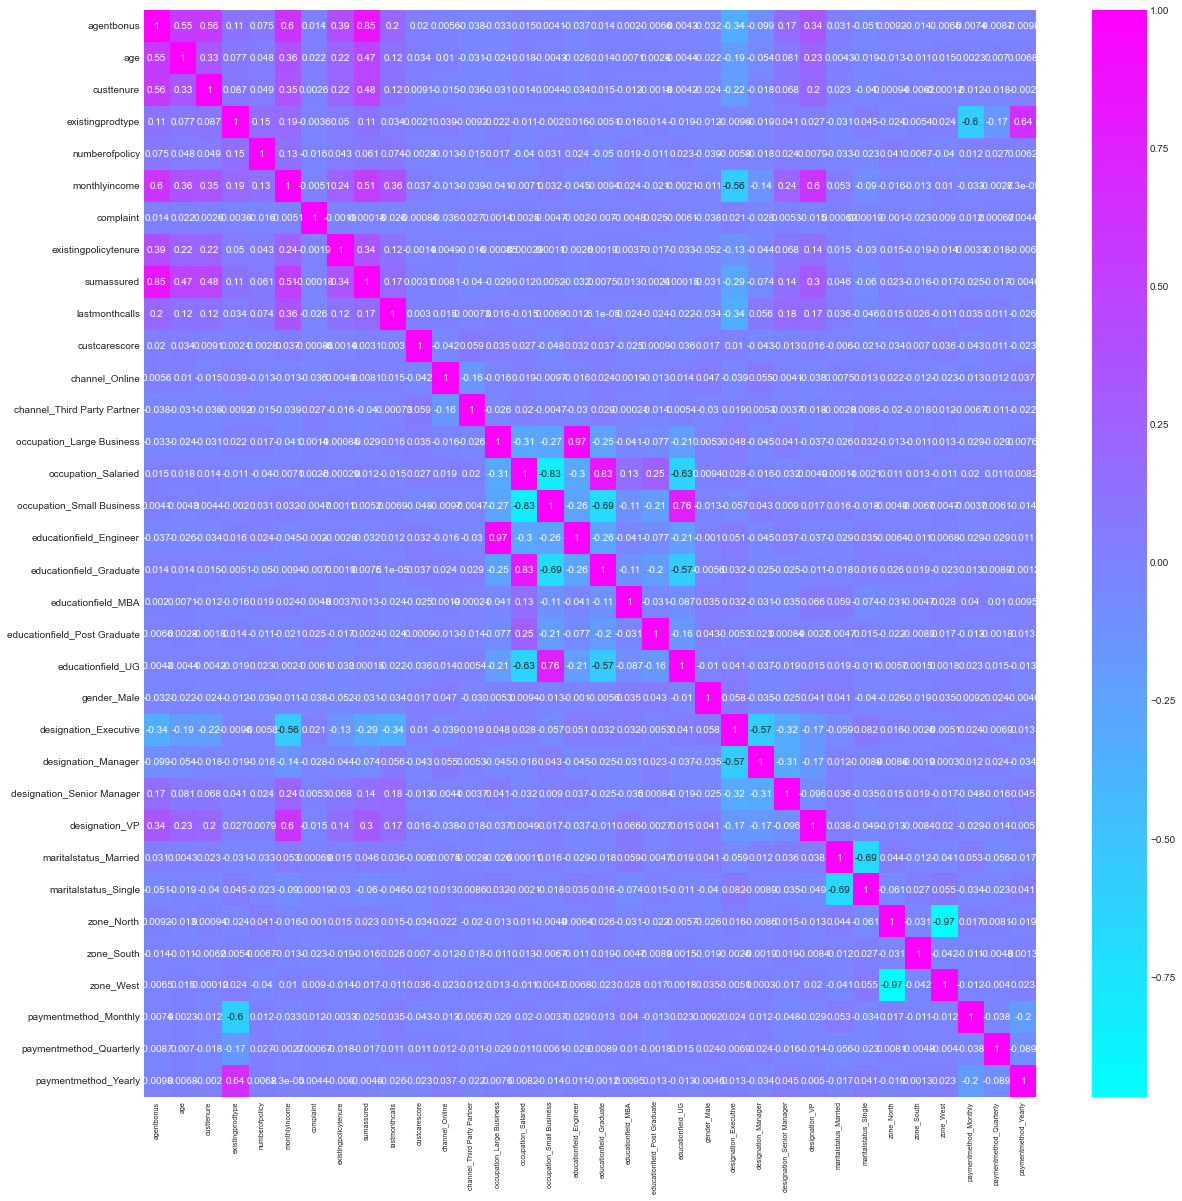

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

## Split the Data

In [ ]:
X = df.drop(['agentbonus'], axis = 1)
y = df.pop('agentbonus')

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (3164, 33)
Shape of X_test:  (1356, 33)
Shape of y_train:  (3164,)
Shape of y_test (1356,)


## Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.7966256186522037
R2_score (train):  0.802677239581947
R2_score (test):  0.7989653474769043
RMSE:  0.10298889623124406


## Polynomial 2nd Degree

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.7966256186522037
R2_score (train):  0.8605614536416629
R2_score (test):  -2.6428059026641296e+16
RMSE:  37341140.29309504


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
  #  ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=4)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('model', Ridge(alpha=3.8))])

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print('CV: ', cv_ridge.mean())
print('R2_score (train): ', r2_score_ridge_train)
print('R2_score (test): ', r2_score_ridge_test)
print("RMSE: ", rmse_ridge)

CV:  0.6983031362986648
R2_score (train):  0.9452096926546997
R2_score (test):  0.723577177348208
RMSE:  0.12076522381446524


## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.012, fit_intercept=True, max_iter=3000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.012, max_iter=3000))])

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Test set results
y_pred_lasso_train = lasso_pipe.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print('CV: ', cv_lasso.mean())
print('R2_score (train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print("RMSE: ", rmse_lasso)

CV:  0.6114620435601706
R2_score (train):  0.6134187303504564
R2_score (test):  0.6140490066541207
RMSE:  0.14269903078914245


## Decision Tree Regression

In [ ]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.7286198693116465
R2_score (train):  1.0
R2_score (test):  0.7248433006749908
RMSE:  0.12048833068915256


## Random Forest Regression

In [ ]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [ ]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8566585219962342
R2_score (train):  0.9806029431795896
R2_score (test):  0.8576054294689077
RMSE:  0.08667655802660652


In [ ]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Decision Tree Regression', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.103,0.803,0.799,0.797
1,Polynomial Regression (2nd),37341140.293,0.861,-26428059026641296.000,0.797
2,Ridge Regression,0.121,0.945,0.724,0.698
3,Lasso Regression,0.143,0.613,0.614,0.611
4,Decision Tree Regression,0.120,1.000,0.725,0.729
5,Random Forest Regression,0.087,0.981,0.858,0.857


## Visualizing Model Performance

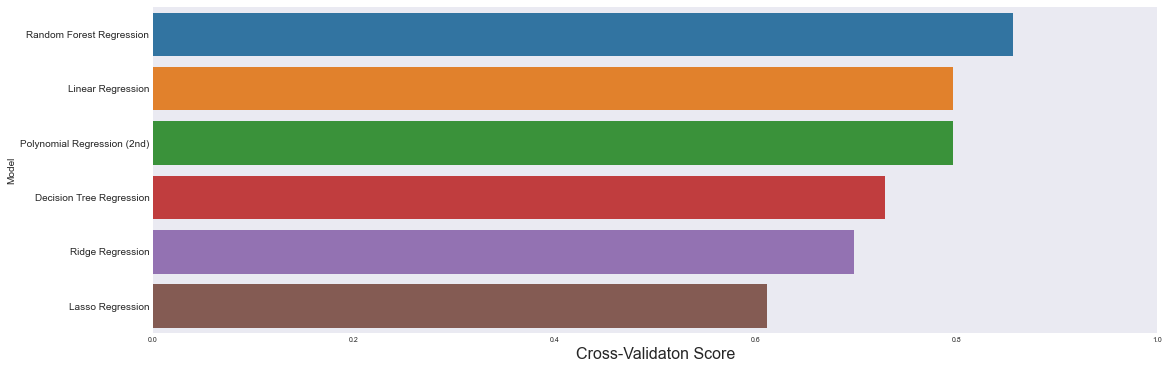

In [ ]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

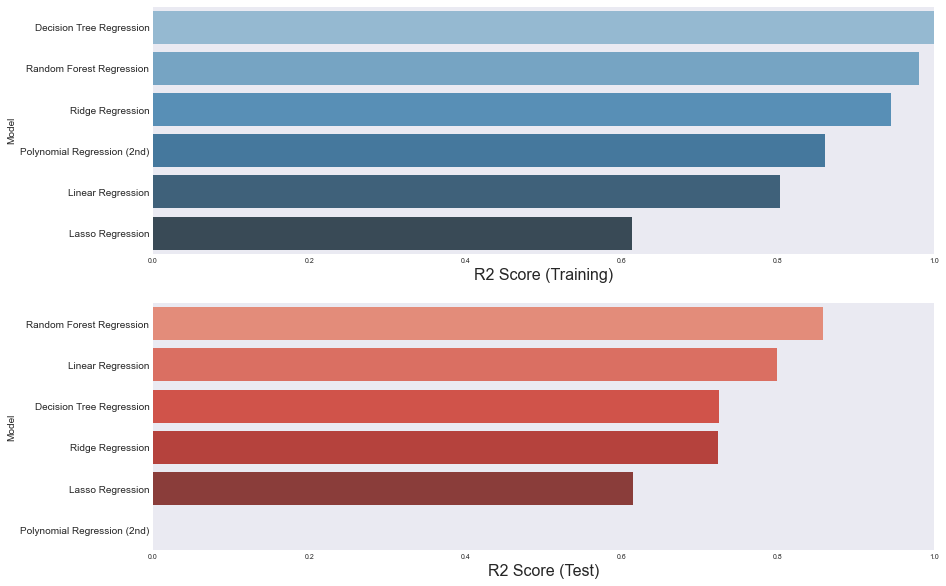

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(training)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

In [ ]:
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
1,Polynomial Regression (2nd),37341140.293,0.861,-26428059026641296.000,0.797
3,Lasso Regression,0.143,0.613,0.614,0.611
2,Ridge Regression,0.121,0.945,0.724,0.698
4,Decision Tree Regression,0.120,1.000,0.725,0.729
0,Linear Regression,0.103,0.803,0.799,0.797
5,Random Forest Regression,0.087,0.981,0.858,0.857


In [ ]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

In [ ]:
predict = predict[predict['RMSE'] < 100]

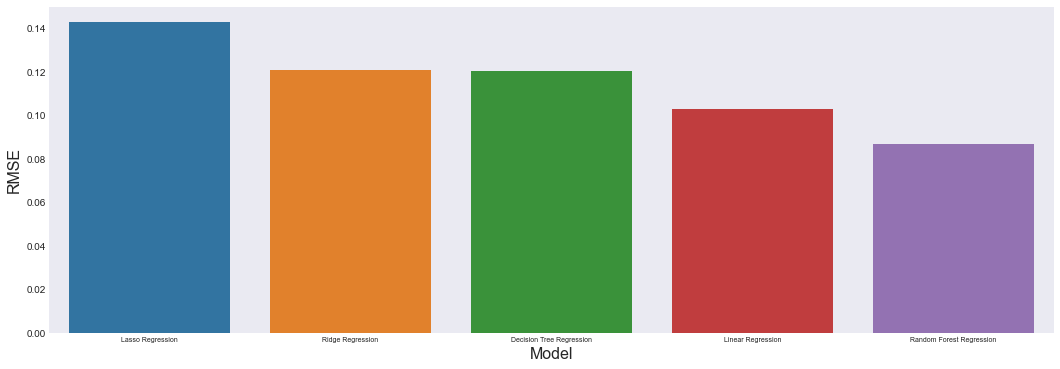

In [ ]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()